In [11]:
import csv
import pandas as pd
df = pd.read_csv('data_clean.csv')
df

,Unnamed: 0,ID,Start_Time,Severity,Start_Lat,Start_Lng,Zipcode,Temperature(F),Humidity(%),Visibility(mi),...,Thunder and Hail,Thunder and Hail / Windy,Thunder in the Vicinity,Thunderstorm,Thunderstorms and Rain,Tornado,Volcanic Ash,Widespread Dust,Wintry Mix,Wintry Mix / Windy
0,0,A-2716600,2016-02-08 00:37:08,3,40.10891,-83.09286,43017.0,42.1,58.0,10.0,...,0,0,0,0,0,0,0,0,0,0
1,1,A-2716601,2016-02-08 05:56:20,2,39.86542,-84.06280,45424.0,36.9,91.0,10.0,...,0,0,0,0,0,0,0,0,0,0
2,2,A-2716602,2016-02-08 06:15:39,2,39.10266,-84.52468,45203.0,36.0,97.0,10.0,...,0,0,0,0,0,0,0,0,0,0
3,3,A-2716603,2016-02-08 06:15:39,2,39.10148,-84.52341,45202.0,36.0,97.0,10.0,...,0,0,0,0,0,0,0,0,0,0
4,4,A-2716604,2016-02-08 06:51:45,2,41.06213,-81.53784,44311.0,39.0,55.0,10.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,1516059,A-4239402,2019-08-23 18:03:25,2,34.00248,-117.37936,92501.0,86.0,40.0,10.0,...,0,0,0,0,0,0,0,0,0,0
1516060,1516060,A-4239403,2019-08-23 19:11:30,2,32.76696,-117.14806,92108.0,70.0,73.0,10.0,...,0,0,0,0,0,0,0,0,0,0
1516061,1516061,A-4239404,2019-08-23 19:00:21,2,33.77545,-117.84779,92866.0,73.0,64.0,10.0,...,0,0,0,0,0,0,0,0,0,0
1516062,1516062,A-4239405,2019-08-23 19:00:21,2,33.99246,-118.40302,90230.0,71.0,81.0,10.0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df1= df.drop('Unnamed: 0', axis=1)
df1= df1.drop('ID', axis=1)
df1= df1.drop('Start_Time', axis=1)
df1= df1.drop("Amenity", axis=1)
df1= df1.drop("Bump", axis=1)
df1= df1.drop("Crossing", axis=1)
df1= df1.drop("Give_Way", axis=1)
df1= df1.drop("Junction", axis=1)
df1= df1.drop("No_Exit", axis=1)
df1= df1.drop("Railway", axis=1)
df1= df1.drop("Roundabout", axis=1)
df1= df1.drop("Station", axis=1)
df1= df1.drop("Stop", axis=1)
df1= df1.drop("Traffic_Calming", axis=1)
df1= df1.drop("Traffic_Signal", axis=1)
df1= df1.drop("Turning_Loop", axis=1)
df1 = df1.dropna()
dataTypeSeries = df1.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
Severity                int64
Start_Lat             float64
Start_Lng             float64
Zipcode               float64
Temperature(F)        float64
                       ...   
Tornado                 int64
Volcanic Ash            int64
Widespread Dust         int64
Wintry Mix              int64
Wintry Mix / Windy      int64
Length: 124, dtype: object


In [13]:
y = df1.loc[:,['Severity']].values
x = df1.drop("Severity", axis=1)

In [16]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
x

array([[ 0.61783758,  0.84207562, -0.57915133, ..., -0.0054228 ,
        -0.02921471, -0.00452948],
       [ 0.57087325,  0.78959895, -0.50262564, ..., -0.0054228 ,
        -0.02921471, -0.00452948],
       [ 0.42375217,  0.76460985, -0.50965189, ..., -0.0054228 ,
        -0.02921471, -0.00452948],
       ...,
       [-0.60375961, -1.0382708 ,  1.00569672, ..., -0.0054228 ,
        -0.02921471, -0.00452948],
       [-0.56190274, -1.06831042,  0.92189044, ..., -0.0054228 ,
        -0.02921471, -0.00452948],
       [-0.53461602, -1.00489627,  0.98916437, ..., -0.0054228 ,
        -0.02921471, -0.00452948]])

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf,  df1[['Severity']]], axis = 1)
finalDf = finalDf.dropna()
finalDf

,principal component 1,principal component 2,Severity
0,-1.689242,0.139234,3.0
1,-2.432829,-0.068290,2.0
2,-2.321432,0.104609,2.0
3,-2.321419,0.104722,2.0
4,-1.518929,0.256189,2.0
...,...,...,...
1462286,2.478374,-0.650365,3.0
1462287,1.494659,-0.878058,3.0
1462288,1.542433,-0.259191,2.0
1462289,1.308992,-0.943388,3.0


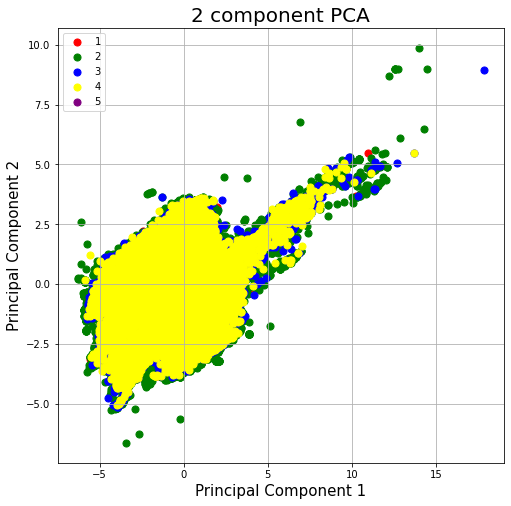

In [18]:
import matplotlib.pylab as plt


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2, 3, 4, 5]
colors = ['r', 'g', 'b','yellow','purple']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Severity'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()